In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Método k-médias

## Leitura dos dados


In [3]:
#Leitura da base de dados
entrega = pd.read_table("/home/wilber/Documentos/wilber@outlook.com/Estudos/FIA/Estatística Aplicada/Aula 22 - Python/Aula 2/Servico_Entrega.txt", sep='\t', decimal=".")

In [4]:
entrega.head()

,ID_Cliente,N_pedidos,Valor,Dist_m_restaurante,Tempo_m_entrega
0,28,1,558,0.8,33
1,122,2,2685,2.6,24
2,152,12,2608,2.6,31
3,173,9,1634,1.2,45
4,204,2,562,2.0,53


In [5]:
# Considerar coluna ID_Cliente como índice
entrega = entrega.set_index('ID_Cliente')

In [6]:
entrega.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
N_pedidos,10000.0,7.00620,13.118619,1.0,1.0,2.0,7.000,212.0
Valor,10000.0,2236.80820,4825.289514,10.0,279.0,688.0,2040.000,70000.0
Dist_m_restaurante,10000.0,2.35721,0.972274,0.0,1.7,2.4,3.025,5.9
Tempo_m_entrega,10000.0,36.91430,13.175413,15.0,26.0,36.5,47.000,83.0


In [24]:
# Utilizando a função prepocessing do Scikit-learn
from sklearn import preprocessing
# Função "preprocessing.StandardScaler().fit(consumo)" transforma as variáveis originais de "consumo" no Z-score
# Empilha as variáveis uma embaixo da outro, construindo uma tabela com 2 colunas: variávele valor
entrega_z = preprocessing.StandardScaler().fit(entrega).transform(entrega)
# Transforma em Data Frame
entrega_z_df = pd.DataFrame(entrega_z, index=entrega.index, columns=entrega.columns)

In [26]:
round(entrega_z_df.describe().transpose(),2)

,count,mean,std,min,25%,50%,75%,max
N_pedidos,10000.0,0.0,1.0,-0.46,-0.46,-0.38,-0.00,15.63
Valor,10000.0,0.0,1.0,-0.46,-0.41,-0.32,-0.04,14.04
Dist_m_restaurante,10000.0,0.0,1.0,-2.42,-0.68,0.04,0.69,3.64
Tempo_m_entrega,10000.0,-0.0,1.0,-1.66,-0.83,-0.03,0.77,3.50


In [27]:
# Importa do Scikit-learn o K-médias
from sklearn.cluster import KMeans

In [19]:
#Instalação do yellowbrick
!pip install yellowbrick

In [20]:
#Para usar método Elbow. Depende do scikit e matplotlib.
from yellowbrick.cluster.elbow import kelbow_visualizer

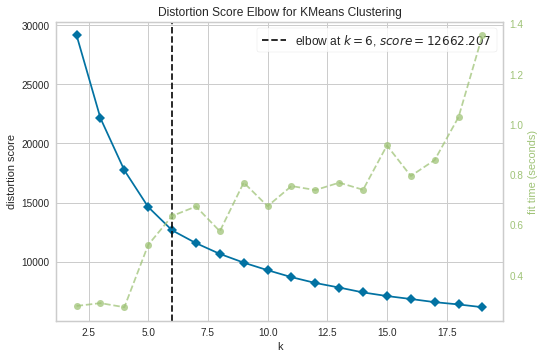

/home/wilber/anaconda3/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


KElbowVisualizer(ax=<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 k=None, model=None)

In [39]:
kelbow_visualizer(KMeans(random_state=321), entrega_z_df, k=(2,20))

In [30]:
# Definição do número de centróides = k
kmeans = KMeans(n_clusters=6,random_state=321)

In [37]:
# Roda o método k-médias com a base padronizadas
kmeans.fit(entrega_z_df)

KMeans(n_clusters=6, random_state=321)

In [33]:
# Mostra as k centróides, se k=6, teremos as posições de 0-5 para checar as centroides
kmeans.cluster_centers_[0]

array([-0.21230476, -0.20523727, -0.85261725,  0.6745614 ])

In [34]:
kmeans.cluster_centers_[2]

array([-0.22162958, -0.21059312,  0.7901539 ,  1.09158854])

In [40]:
# Mostra para cada observação (índice da base), a qual cluster foi alocado
kmeans.labels_

array([5, 3, 3, ..., 0, 3, 4], dtype=int32)

In [41]:
# Atribui na base de dados os clusteRs
entrega['clusterk_z']=kmeans.labels_
entrega['clusterk_z'].value_counts()

3    2555
5    2262
2    2211
0    2165
1     711
4      96
Name: clusterk_z, dtype: int64

In [ ]:
# Empilha as variáveis uma embaixo da outro, construindo uma tabela com 2 colunas: variável e valor
tabela_clusterk_z=pd.melt(entrega,id_vars='clusterk_z')


In [42]:
g = sns.FacetGrid(tabela_clusterk_z, col="variable", sharey=False, col_wrap=3) 
g.map_dataframe(sns.boxplot, x="clusterk_z", y="value") 

NameError: name 'tabela_clusterk_z' is not defined